In [172]:
# data analysis and wrangling

import pandas as pd
import numpy as np


# visualization
import matplotlib.pyplot as plt
import seaborn as sn

import warnings 
warnings.filterwarnings('ignore')

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [173]:
df=pd.read_csv('hrattrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [174]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [175]:
categorical_features=df.select_dtypes(include=[np.object])
categorical_features.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [176]:
numerical_features=df.select_dtypes(include=[np.number])
numerical_features.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [177]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [178]:
# No null values so not required to manage either mean,median or mode for categorical features

<AxesSubplot:xlabel='Attrition', ylabel='count'>

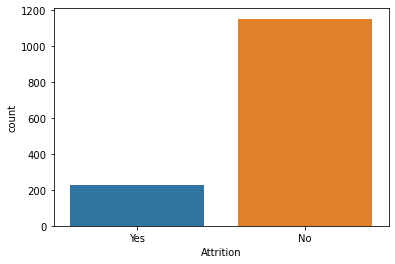

In [179]:
sn.countplot(df['Attrition'])

In [180]:
df['Attrition'].value_counts()

No     1153
Yes     229
Name: Attrition, dtype: int64

In [181]:
# imbalance is there so need to use sampling technique 

In [182]:
# Label encoder to convert categorical features

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Attrition']=LE.fit_transform(df['Attrition'])
df['BusinessTravel']=LE.fit_transform(df['BusinessTravel'])
df['Department']=LE.fit_transform(df['Department'])
df['EducationField']=LE.fit_transform(df['EducationField'])
df['Gender']=LE.fit_transform(df['Gender'])
df['JobRole']=LE.fit_transform(df['JobRole'])
df['MaritalStatus']=LE.fit_transform(df['MaritalStatus'])
df['Over18']=LE.fit_transform(df['Over18'])
df['OverTime']=LE.fit_transform(df['OverTime'])




In [183]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [184]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [185]:
cor=df.corr()

In [186]:
cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.173353,0.033597,0.020330,-0.033945,-0.016277,0.209695,-0.032283,NaN,-0.004894,...,0.058186,NaN,0.033237,0.684818,-0.011444,-0.010976,0.313173,0.208133,0.219259,0.202114
Attrition,-0.173353,1.000000,-0.001045,-0.063821,0.057941,0.074143,-0.037443,0.020871,NaN,0.010348,...,-0.051198,NaN,-0.148649,-0.177689,-0.061928,-0.061717,-0.132113,-0.160357,-0.034581,-0.157522
BusinessTravel,0.033597,-0.001045,1.000000,-0.000003,-0.016313,-0.025116,0.003075,0.024185,NaN,-0.015216,...,-0.037149,NaN,-0.007104,0.039476,0.014577,-0.013558,-0.008229,-0.007697,-0.030945,-0.016808
DailyRate,0.020330,-0.063821,-0.000003,1.000000,0.003526,0.006596,-0.022886,0.025780,NaN,-0.044959,...,0.006514,NaN,0.033988,0.026177,0.010425,-0.042282,-0.022520,0.023959,-0.022012,-0.015057
Department,-0.033945,0.057941,-0.016313,0.003526,1.000000,0.016452,0.006890,0.015719,NaN,-0.018045,...,-0.023754,NaN,-0.014345,-0.016970,0.035791,0.037260,0.019844,0.048529,0.039573,0.036127
DistanceFromHome,-0.016277,0.074143,-0.025116,0.006596,0.016452,1.000000,0.012506,0.008879,NaN,0.032373,...,0.013436,NaN,0.058690,-0.014302,-0.031357,-0.028327,-0.004560,0.008994,0.005403,0.008109
Education,0.209695,-0.037443,0.003075,-0.022886,0.006890,0.012506,1.000000,-0.027993,NaN,0.037515,...,-0.008128,NaN,0.023282,0.152037,-0.016991,0.006478,0.069869,0.062725,0.059471,0.077029
EducationField,-0.032283,0.020871,0.024185,0.025780,0.015719,0.008879,-0.027993,1.000000,NaN,0.008692,...,-0.007385,NaN,-0.017638,-0.017812,0.040340,0.044475,-0.014162,-0.009477,-0.003992,-0.002527
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.004894,0.010348,-0.015216,-0.044959,-0.018045,0.032373,0.037515,0.008692,NaN,1.000000,...,-0.047669,NaN,0.062074,-0.009047,0.013289,0.013376,-0.021992,-0.027658,-0.005865,-0.017540


<AxesSubplot:>

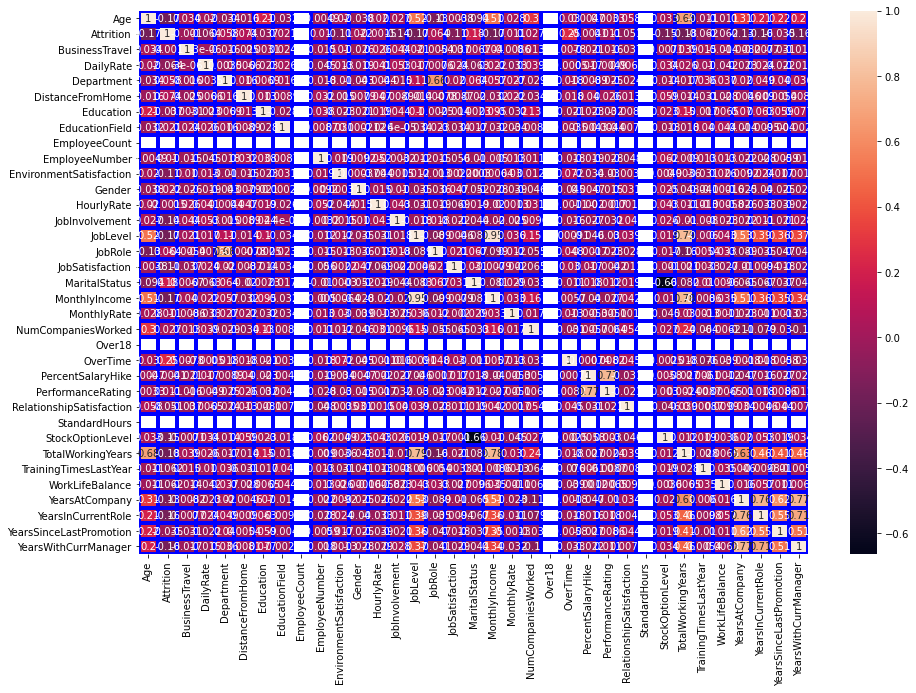

In [187]:
plt.figure(figsize=(15,10))
sn.heatmap(cor,annot=True,linewidth=3,linecolor='blue')

In [188]:
# from above correlation can see age,distance from home,department and education are nearly correlated
# plotting features against target variable ie attrition from above corelation table

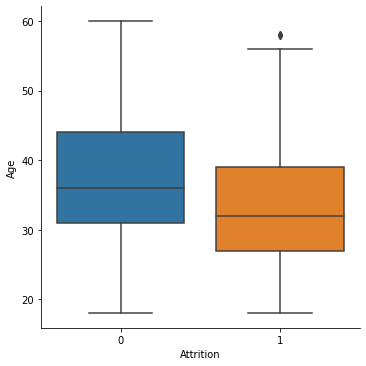

In [189]:
sn.factorplot(data=df,y='Age',x='Attrition',size=5,kind='box')

In [190]:
# can see as age is more so the attrition is less

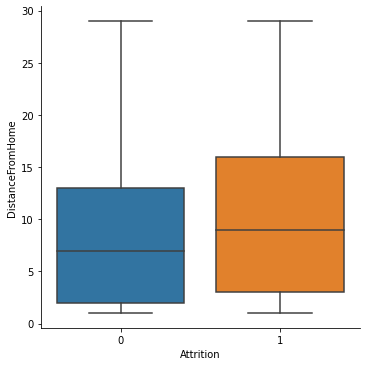

In [191]:
sn.factorplot(data=df,y='DistanceFromHome',x='Attrition',size=5,kind='box')

In [192]:
# the more the distance from home so more is attrition

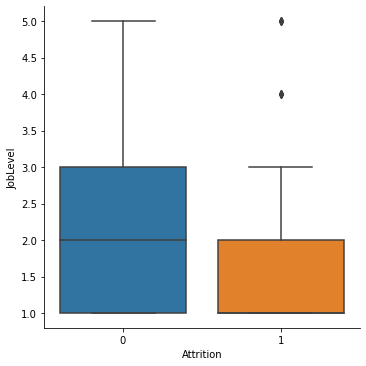

In [193]:
sn.factorplot(data=df,y='JobLevel',x='Attrition',size=5,kind='box')

In [194]:
# if the job level is high so less is attrition, so more attrition is in low level jobs

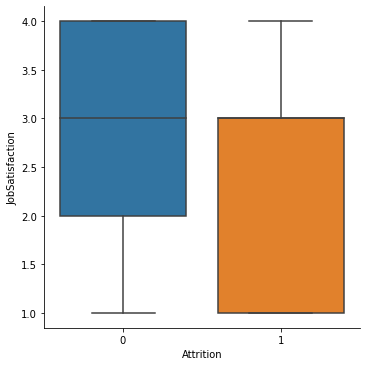

In [195]:
sn.factorplot(data=df,y='JobSatisfaction',x='Attrition',size=5,kind='box')

In [196]:
# highert the job satisfaction so less is attrition

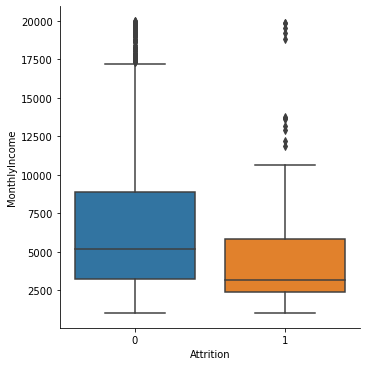

In [197]:
sn.factorplot(data=df,y='MonthlyIncome',x='Attrition',size=5,kind='box')

In [198]:
# less monthly income is reason for attrition

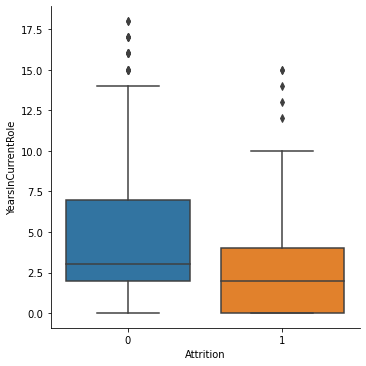

In [199]:
sn.factorplot(data=df,y='YearsInCurrentRole',x='Attrition',size=5,kind='box')

In [200]:
# less number of years in current role will be reason of attrition

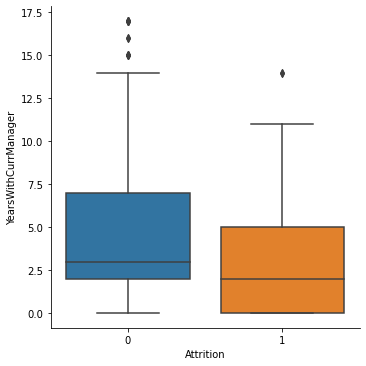

In [201]:
sn.factorplot(data=df,y='YearsWithCurrManager',x='Attrition',size=5,kind='box')

In [202]:
# once comfort level with current manager goes up so less will be attrition

In [203]:
df.skew()

Age                         0.404309
Attrition                   1.800161
BusinessTravel             -1.438063
DailyRate                  -0.007474
Department                  0.179208
DistanceFromHome            0.961518
Education                  -0.273334
EducationField              0.548193
EmployeeCount               0.000000
EmployeeNumber              0.019383
EnvironmentSatisfaction    -0.321802
Gender                     -0.389646
HourlyRate                 -0.041962
JobInvolvement             -0.490290
JobLevel                    1.016300
JobRole                    -0.354271
JobSatisfaction            -0.325858
MaritalStatus              -0.152776
MonthlyIncome               1.357067
MonthlyRate                 0.013689
NumCompaniesWorked          1.024063
Over18                      0.000000
OverTime                    0.953085
PercentSalaryHike           0.828994
PerformanceRating           1.933407
RelationshipSatisfaction   -0.324009
StandardHours               0.000000
S

In [204]:
collist=df.columns.values
ncol=15
nrows=10

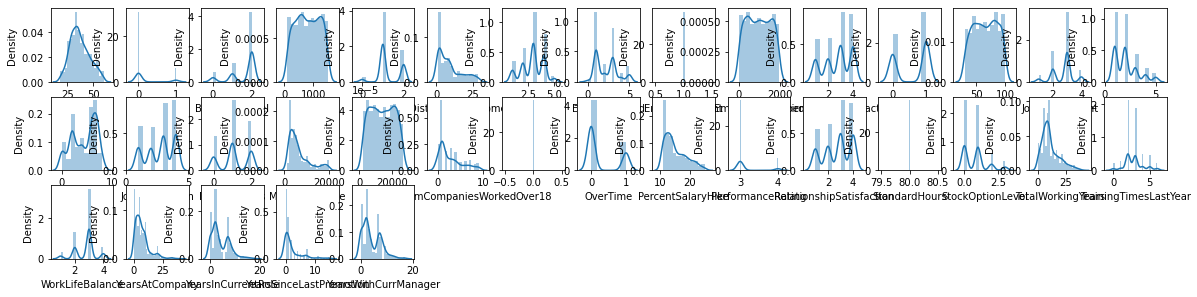

In [205]:
# plotting dist plot to check data distribution 
# snapshot of distribution curves of all input datas

plt.figure(figsize=(20,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sn.distplot(df[collist[i]])

In [206]:
# dropping below attributes as not very specific in predicting

In [207]:
df.drop('EmployeeCount',axis=1,inplace=True)
df.drop('Over18',axis=1,inplace=True)
df.drop('StandardHours',axis=1,inplace=True)
df.drop('EmployeeNumber',axis=1,inplace=True)

In [208]:
df.shape

(1382, 31)

In [209]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [210]:
# using standard scaler to scale the data
# Model building and training

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,precision_score,recall_score
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Attrition',axis=1))
x=scaled_df
y=df['Attrition']

In [211]:
x

array([[ 0.43994451,  0.59154376,  0.7377334 , ..., -0.05337686,
        -0.67733736,  0.24945654],
       [ 1.31069755, -0.91957172, -1.30754976, ...,  0.77546375,
        -0.36870557,  0.80956855],
       [ 0.00456799,  0.59154376,  1.4112106 , ..., -1.15849767,
        -0.67733736, -1.15082348],
       ...,
       [-1.08387331, -0.91957172,  1.32174499, ..., -1.15849767,
        -0.67733736, -1.15082348],
       [-0.21312027,  0.59154376, -0.306032  , ..., -0.32965706,
        -0.67733736, -0.03059946],
       [-0.97502918, -2.43068721,  0.74021856, ..., -0.32965706,
        -0.36870557, -0.03059946]])

In [212]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1377    0
1378    0
1379    1
1380    0
1381    0
Name: Attrition, Length: 1382, dtype: int32

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [214]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)

In [215]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("best accuracy is",maxAccu,"on random_state",maxRs)

best accuracy is 0.8457831325301205 on random_state 29


In [216]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=105)

In [217]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [218]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.8121387283236994


In [219]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.8554913294797688


In [220]:
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.8641618497109826


In [221]:
# Cross Validation 

from sklearn.model_selection import cross_val_score

In [222]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.7742374300214514


In [223]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8560063830900434


In [224]:
print(cross_val_score(sv,x,y,cv=5).mean())

0.8581802961335218


In [225]:
# after analysing accuracy scores and cross validation scores difference for all model,found RFC and SV are at same level,so doing hyper parameter tuning for both.

In [226]:
#SVC parameters hyper tuning
from sklearn.model_selection import GridSearchCV

parameters={'C':[0.1,1,10,100,500],
           'kernel':['poly','rbf','sigmoid']
           }

In [227]:
GCV_SVC=GridSearchCV(SVC(),parameters,cv=5)
GCV_SVC.fit(x_train,y_train)
GCV_SVC.best_params_

{'C': 100, 'kernel': 'rbf'}

In [228]:
SVC_mod=SVC(C=100,kernel='rbf')
SVC_mod.fit(x_train,y_train)
pred=SVC_mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

86.70520231213872


In [229]:
#RandomForestClassifier hyper tuning

parameters={'n_estimators':[100],
           'max_features':['auto','sqrt'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [230]:
GCV_RF=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV_RF.fit(x_train,y_train)
GCV_RF.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [231]:
RF_mod=RandomForestClassifier(criterion='entropy',max_depth=8,max_features='sqrt',n_estimators=100)
RF_mod.fit(x_train,y_train)
pred=RF_mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

84.10404624277457


# Conclusion 

In [ ]:
#from above analysis found SVC and RFC is performoing almost at same rate,but SVC is slightly higher so will save SVC

In [233]:
# Saving the Model

In [235]:
import joblib
joblib.dump(SVC_mod,"HRAttritionpredictionmodel.pkl")

['HRAttritionpredictionmodel.pkl']